## LOGIC BUILING EASY LEVEL PROBLEMS

# Sum of Digits of a Number

Given a number n, find the sum of its digits.

Examples : 

Input: n = 687
Output: 21
Explanation: The sum of its digits are: 6 + 8 + 7 = 21

Input: n = 12
Output: 3
Explanation: The sum of its digits are: 1 + 2 = 3

In [1]:
def SumofDigits(n):
    sum=0
    while(n>0):
        num=n%10
        sum+=num
        n=n//10
    return sum
SumofDigits(687)

'''[Approach 1] Digit Extraction - O(log10n) Time and O(1) Space
We can sum the digits of a number by repeatedly extracting the last digit using n % 10, 
adding it to the sum, and then removing it by dividing n by 10 using integer division.'''

'[Approach 1] Digit Extraction - O(log10n) Time and O(1) Space\nWe can sum the digits of a number by repeatedly extracting the last digit using n % 10, \nadding it to the sum, and then removing it by dividing n by 10 using integer division.'

In [ ]:
def sumofDigits(n):
    if n==0:
        return 0
    return (n%10)+sumofDigits(n//10)
print(sumofDigits(123))
# [Approach 2] Using Recursion - O(log10n) Time and O(log10n) Space
 

6


In [ ]:
def sumofDigits(n):
    ns=str(n)
    res=0
    for ch in ns:
        res+=int(ch)
    return res
print(sumofDigits(123))
# [Approach 3] String Conversion
# Convert the number to a string and iterate through each character (digit). 
# For each character, subtract the ASCII value of '0' to get the actual digit, then add it to the sum.
# Time Complexity: O(d) – we iterate over each of the d digits, where d ≈ log₁₀(n) (count of digits)
# Auxiliary Space: O(d) - to store all d digits as characters.44

6


# program to reverse digits of a number

Given an Integer n, find the reverse of its digits.

Examples:  

Input: n = 122
Output: 221
Explanation: By reversing the digits of number, number will change into 221.

Input: n = 200
Output: 2
Explanation: By reversing the digits of number, number will change into 2.

Input: n = 12345 
Output: 54321
Explanation: By reversing the digits of number, number will change into 54321.

In [ ]:
def revdigits(num):
    revnum=0
    while(num>0):
        rem=num%10
        revnum=revnum*10+rem
        num=num//10
    return revnum
print(revdigits(123))
# Time Complexity - O(log n)
# Space Complexity - O(1)

321


In [2]:
import pandas as pd

def map_excel_data(excel1_path, excel2_path, output_path):
    """
    Compares 'CarRecordingID' column of two Excel files, maps data from excel1 to excel2
    and saves the updated excel2 to a new file.

    Args:
        excel1_path (str): Path to the first Excel file (source).
        excel2_path (str): Path to the second Excel file (destination).
        output_path (str): Path to save the updated Excel file.
    """

    try:
        # Read both Excel files into pandas DataFrames
        df1 = pd.read_excel(excel1_path)
        df2 = pd.read_excel(excel2_path)

        # Set 'CarRecordingID' as index in both DataFrames for efficient lookup
        df1 = df1.set_index('CarRecordingID')
        df2 = df2.set_index('CarRecordingID')

        # Columns to populate from excel1 to excel2
        columns_to_populate = [
            'Driver_Actual',
            'Passenger_Actual',
            'FrontMiddlePassenger_Actual',
            'RearMiddlePassenger_Actual',
            'RearLeft_Passenger_Actual',
            'RearRight_Passenger_Actual'
        ]

        # Iterate through the index of df2 (excel2)
        for car_recording_id in df2.index:
            if car_recording_id in df1.index:
                # Map the data from df1 to df2 based on 'CarRecordingID'
                df2.loc[car_recording_id, columns_to_populate] = df1.loc[car_recording_id, columns_to_populate].values

        # Reset index
        df1 = df1.reset_index()
        df2 = df2.reset_index()

        # Save the updated DataFrame (df2) to a new Excel file
        df2.to_excel(output_path, index=False)

        print(f"Data mapping complete. Updated Excel file saved to {output_path}")

    except FileNotFoundError:
        print("Error: One or both of the specified Excel files were not found.")
    except KeyError as e:
        print(f"Error: Column '{e}' not found in one of the Excel files.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Example usage:
excel1_path = r"D:\KPI\235.4\Data_correction_167_540.xlsx"  # Replace with the actual path to your first Excel file
excel2_path = r"D:\KPI\235.4\167_540_Corrections.xlsx"  # Replace with the actual path to your second Excel file
output_path = r"D:\KPI\235.4\output.xlsx"  # Replace with the desired path for the output Excel file

map_excel_data(excel1_path, excel2_path, output_path)

Data mapping complete. Updated Excel file saved to D:\KPI\235.4\output.xlsx


In [6]:
import pandas as pd

def compare_and_highlight_by_carrecordingid(excel_file, output_file):
    """
    Compares specified columns in an Excel file, matching rows based on 'CarRecordingID',
    and highlights mismatches.

    Args:
        excel_file (str): Path to the Excel file.
        output_file (str): Path to save the Excel file with highlighted mismatches.
    """

    try:
        # Read the Excel file into a pandas DataFrame
        df = pd.read_excel(excel_file)

        # Define the column pairs to compare
        column_pairs = {
            'Driver_Metadata': 'Driver_Actual',
            'Passenger_Metadata': 'Passenger_Actual',
            'MiddlePassenger_Metadata': 'RearMiddlePassenger_Actual',
            'LeftPassenger_Metadata': 'RearLeft_Passenger_Actual',
            'RightPassenger_Metadata': 'RearRight_Passenger_Actual',
            'FrontMiddlePassenger_Metadata': 'FrontMiddlePassenger_Actual'
        }

        # Create a style function to highlight mismatches
        def highlight_mismatches(row):
            # Initialize an empty list to store the styles for each column
            styles = [''] * len(row)  # Default: no style for any column

            for idx, (metadata_col, actual_col) in enumerate(column_pairs.items()):
                try:
                    if row[metadata_col] != row[actual_col]:
                        # Apply yellow background to both the Metadata and Actual columns
                        metadata_col_idx = df.columns.get_loc(metadata_col)
                        actual_col_idx = df.columns.get_loc(actual_col)

                        styles[metadata_col_idx] = 'background-color: yellow'
                        styles[actual_col_idx] = 'background-color: yellow'

                except KeyError as e:
                    print(f"Error: Column '{e}' not found in row. Check column names and case. Column name: {e}")
                except Exception as e:
                    print(f"An unexpected error occurred while comparing columns: {e}")

            return styles

        # Apply the style function to the DataFrame
        styled_df = df.style.apply(highlight_mismatches, axis=1)

        # Save the styled DataFrame to an Excel file
        styled_df.to_excel(output_file, index=False, engine='openpyxl')

        print(f"Comparison complete. Highlighted Excel file saved to {output_file}")

    except FileNotFoundError:
        print("Error: The specified Excel file was not found.")
    except KeyError as e:
        print(f"Error: Column '{e}' not found in the Excel file. Check column names and case. Column name: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Example usage



# Example usage:
excel_file = r"D:\KPI\235.4\output.xlsx"  # Replace with the actual path to your Excel file
output_file = r"D:\KPI\235.4\output_highlighted.xlsx" # Replace with the desired path for the output Excel file


compare_and_highlight_by_carrecordingid(excel_file, output_file)



Comparison complete. Highlighted Excel file saved to D:\KPI\235.4\output_highlighted.xlsx


In [ ]:
def reverseDigits(n, revNum, basePos):
    if n > 0:
        reverseDigits(n // 10, revNum, basePos)  
        revNum[0] += (n % 10) * basePos[0]       
        basePos[0] *= 10                         

# Driver code
n = 4562
revNum = [0]  
basePos = [1]  
reverseDigits(n, revNum, basePos)
print(revNum[0])
#program to rever the disgits of a number using recursion
# Time Complexity - O(log n)
# Space Complexity - O(log n)

In [ ]:
def reverseDigits(n):
    s=str(n)

    s=list(s)
    s.reverse()
    s=''.join(s)

    n=int(s)
    return n

print(reverseDigits(234))
# Time Complexity - O(log n)
# Space Complexity - O(1)

# Note: The above program doesn't consider leading zeroes. For example, for 100 programs will print 1. If you want to print 001


432


In [11]:
'''Using String and Slicing in Python
The approach used is "Using Slicing". This technique involves converting the number into a string,
 then reversing that string by using slicing operations. After reversing, the string is converted back into a number. 
 This method is simple and efficient but requires additional space for storing the string representation of the number.'''

def reverseDigits(n):
    s=str(n)
    s=s[::-1]
    n=int(s)
    return n
reverseDigits(56789876543)
# Time Complexity - O(n)
# Space Complexity - O(n)

34567898765

In [36]:
import sqlite3
import pandas as pd

def execute_query_and_dump_to_csv(db_path, sql_query, output_csv_path):
    """
    Execute a SQL query on a database and dump the results to a CSV file.

    Args:
        db_path (str): Path to the SQLite database file.
        sql_query (str): SQL query to execute.
        output_csv_path (str): Path to the output CSV file.
    """
    try:
        # Connect to the SQLite database
        conn = sqlite3.connect(db_path)
        
        # Execute the SQL query and fetch the results into a DataFrame
        df = pd.read_sql_query(sql_query, conn)
        
        # Dump the DataFrame to a CSV file
        df.to_csv(output_csv_path, index=False)
        
        print(f"Query results successfully dumped to {output_csv_path}")
    
    except sqlite3.Error as e:
        print(f"An error occurred: {e}")
    
    finally:
        # Close the database connection
        if conn:
            conn.close()

# Example usage
db_path = r"D:\KPI\235.4\SOD_merge_database_18_09_2025_1.db"  # Replace with your database path
sql_query = '''select distinct A.ParticipantID,B.file_info_id, B.CarRecordingID,
                A.Driver, A.Passenger, A.MiddlePassenger, A.LeftPassenger, A.RightPassenger,B.DatasetID,A.Requirement_Id,
                C.DriverSeat_Occupant, C.PassengerSeat_Occupant, C.MiddlePassengerSeat_Occupant, C.LeftPassengerSeat_Occupant, C.RightPassengerSeat_Occupant
                from Metadata A
                inner join
                ImageName_Table B
                on A.CarRecordingID = B.CarRecordingID
                inner join 
                SeatOccupantDetails_Table C
                on B.file_info_id = C.file_info_id
                where B.carRecordingID like '%AMX244%'and A.Requirement_Id NOT IN ('2.22_SB', '2.23_SB', '2.24_SB');'''  # Replace with your SQL query
output_csv_path = r"D:\KPI\235.4\incorrect_recordings-244-annotations.csv"  # Replace with your desired output CSV path

execute_query_and_dump_to_csv(db_path, sql_query, output_csv_path)

Query results successfully dumped to D:\KPI\235.4\incorrect_recordings-244-annotations.csv


In [ ]:
import pandas as pd

def remove_duplicate_file_info_ids(csv_file_path, output_file_path):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file_path)

    # Identify duplicated file_info_id values
    duplicated_file_info_ids = df[df.duplicated('file_info_id', keep=False)]

    # Remove rows with duplicated file_info_id values
    df_cleaned = df.drop(duplicated_file_info_ids.index)

    # Save the cleaned DataFrame to a new CSV file
    df_cleaned.to_csv(output_file_path, index=False)

    print(f"Rows with duplicated file_info_ids have been removed. Cleaned data saved to {output_file_path}.")

# Example usage
csv_file_path = 'your_file.csv'  # Replace with your CSV file path
output_file_path = 'cleaned_file.csv'  # Specify the output file path
remove_duplicate_file_info_ids(csv_file_path, output_file_path)

In [34]:
import pandas as pd

def find_repeated_file_info_ids(csv_file_path):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file_path)

    # Group by 'carrecordingid' and 'file_info_id', then count occurrences
    grouped = df.groupby(['CarRecordingID', 'file_info_id']).size()

    # Find carrecordingid with multiple file_info_ids
    repeated_ids = grouped.groupby(level=0).filter(lambda x: len(x) > 1).index.get_level_values(0).unique()

    # Print the carrecordingid values with repeated file_info_ids
    print("Carrecording IDs with repeated file_info_ids:")
    for carrecordingid in repeated_ids:
        print(carrecordingid)

# Example usage
csv_file_path = r"D:\KPI\235.4\244_incorrect_recordings.csv"  # Replace with your CSV file path
find_repeated_file_info_ids(csv_file_path)

Carrecording IDs with repeated file_info_ids:
AMX244_176_1000682734_20250804_172905
AMX244_176_1031273840_20250815_173039
AMX244_176_1035232770_20250814_173107
AMX244_176_1054524238_20250806_113001
AMX244_176_1066292554_20250805_195205
AMX244_176_1077607252_20250804_154406
AMX244_176_1085860775_20250808_110359
AMX244_176_1087853999_20250815_142152
AMX244_176_1090737575_20250808_113258
AMX244_176_1094914704_20250729_103706
AMX244_176_1106062552_20250807_171123
AMX244_176_1109433914_20250814_145215
AMX244_176_1112636265_20250814_164900
AMX244_176_1114661853_20250729_111034
AMX244_176_1117296005_20250807_152255
AMX244_176_1129505203_20250805_203327
AMX244_176_1133403983_20250805_172936
AMX244_176_1141565319_20250815_143850
AMX244_176_1142670406_20250804_110619
AMX244_176_1147210528_20250807_163632
AMX244_176_1162941573_20250805_201851
AMX244_176_1167601039_20250806_110009
AMX244_176_1168254831_20250804_114554
AMX244_176_1185322655_20250806_123211
AMX244_176_1189768619_20250804_162004
AMX2

#Check is a number is Prime
Given a positive integer, check if the number is prime or not. A prime is a natural number greater than 1 that has no positive divisors other than 1 and itself. Examples of the first few prime numbers are {2, 3, 5, ...}
Examples : 

Input:  n = 11
Output: true

Input:  n = 15
Output: false

Input:  n = 1
Output: false 

In [ ]:
def isPrime(n):
    if n<=1:
       return False
    for i in range(2,n):
        if n%i==0:
            return False
    return True
print(isPrime(44))

# Time complexity: O(n)
# Auxiliary Space: O(1)

False


In [ ]:
import math
def isPrime(n):
    if n<=1:
        return False
    for i in range (2,int(math.sqrt(n))):
        if n%i==0:
            return False
    return True
print(isPrime(11))

# Time Complexity: O(√n)
# Auxiliary Space: O(1)

True


In [ ]:
# Another approach
# It is based on the fact that all primes greater than 3 are of the form 6k ± 1,
# where k is any integer greater than 0. This is because all integers can be expressed as (6k + i), 
# where i = −1, 0, 1, 2, 3, or 4. And note that 2 divides (6k + 0), (6k + 2), and (6k + 4) and 3 divides (6k + 3). 
# So, a more efficient method is to test whether n is divisible by 2 or 3, then to check through all numbers of the form
#  6k ± 1 <= √n. This is 3 times faster than testing all numbers up to √n.

# Python program to check the given number
# is prime or not

# Function to check if the given number
# is prime or not.
import math

def isPrime(n):
    if n == 2 or n == 3:
        return True
    elif n <= 1 or n % 2 == 0 or n % 3 == 0:
        return False
      
        # To check through all numbers of the form 6k ± 1
    # until i <= square root of n, with step value 6
    for i in range(5, int(math.sqrt(n))+1, 6):
        if n % i == 0 or n % (i+2) == 0:
            return False

    return True

# # Driver code
print(isPrime(11))
print(isPrime(20))

# Time Complexity: O(√n)
# Auxiliary Space: O(1)


True
False


In [ ]:
def isPower(x, y):
    # The only power of 1 is 1 itself
    if x == 1:
        return y == 1

    # Repeatedly compute power of x
    num=1
    while num<y:
        num*=x
    if num==y:
        return True
    return False

if __name__ == '__main__':
    print(isPower(10, 1))
    print(isPower(1, 20))
    print(isPower(2, 128))
    print(isPower(2, 30))
# Time complexity: O(Logxy)
# Auxiliary space: O(1)

True
False
True
False


In [ ]:
'''[Better Approach] Exponentiation and Binary Search Method
This approach efficiently checks if a number y is a power of another number x by leveraging exponential growth and binary search. 
It first attempts to reach or exceed y by repeatedly squaring x, which significantly reduces the number of multiplications 
compared to simple iteration. If the squared value matches y, the function returns true. 
If it overshoots y, a binary search is performed between the last two computed powers of x to find an exact match.'''

import math
def power(x,y):
    if(x==1):
        return 1
    num=1
    while num<y:
        num*=x
        if num==y:
            return True
   

    low=x,high=y,
    while low<=high:
        mid=low + (low+high)//2
        result=(x**(int(math.log(mid)/math.log(x))))
        if result==y:
            return True
        if result<y:
            low=mid+1
        else:
            high=mid-1

    return False

print("true" if isPower(10, 1) else "false")
print("true" if isPower(1, 20) else "false")
print("true" if isPower(2, 128) else "false")
print("true" if isPower(2, 30) else "false")

# Time Complexity - O(log log y)
# Auxiliary Space - O(1)


true
false
true
false


In [ ]:
'''[Expected Approach] Logarithmic Method
This approach checks if y is a power of x using logarithms. By applying the logarithm change of base formula, 
it computes log⁡y(x)=log⁡(y)/log⁡(x). If the result is an integer, it means that y is an exact power of x, and the 
function returns true. Otherwise, it returns false.'''
import math
def isPower(x,y):
    result=math.log(y)/math.log(x)
    return result==math.floor(result)
print(isPower(2,26))
print(isPower(2,16))
# Time complexity: O(1)
# Auxiliary space: O(1)

False
True


#Program to calculate distance between two points
You are given two coordinates (x1, y1) and (x2, y2) of a two-dimensional graph. Find the distance between them.

Examples: 

Input : x1, y1 = (3, 4)
           x2, y2 = (7, 7)
Output : 5

Input : x1, y1 = (3, 4) 
           x2, y2 = (4, 3)
Output : 1.41421
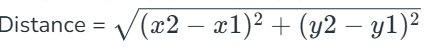

In [26]:
'''Calculate the distance between two points.
We will use the distance formula derived from Pythagorean theorem.
The formula for distance between two point (x1, y1) and (x2, y2) is'''
import math
def DistanceBetweenTwoPoints(x1,y1,x2,y2):
    return math.sqrt(math.pow(x2-x1,2)+math.pow(y2-y1,2))

print(DistanceBetweenTwoPoints(3, 4, 4, 3))

1.4142135623730951


#Check whether triangle is valid or not if sides are given

Given three sides, check whether triangle is valid or not. 

Examples:  

Input :  a = 7, b = 10, c = 5 
Output : Valid
We can draw a triangle with the given three edge lengths.

Input : a = 1, b = 10, c = 12 
Output : Invalid
We can not draw a triangle with the given three edge lengths.
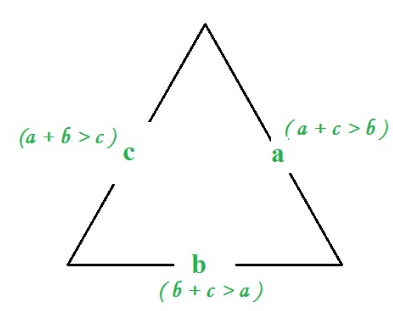

In [ ]:
def isValidTriangle(a,b,c):
    if (a+b>c) or (b+c>a) or (a+c>b):
        return True
    return False
print(isValidTriangle(7,10,5))

# Time Complexity: O(1)
# Auxiliary Space: O(1)

True


#Find if two rectangles overlap

Given two rectangles, find if the given two rectangles overlap or not.
Note that a rectangle can be represented by two coordinates, top left and bottom right. So mainly we are given following four coordinates. 
l1: Top Left coordinate of first rectangle. 
r1: Bottom Right coordinate of first rectangle. 
l2: Top Left coordinate of second rectangle. 
r2: Bottom Right coordinate of second rectangle.
Note : It may be assumed that the rectangles are parallel to the coordinate axis.
One solution is to one by one pick all points of one rectangle and see if the point lies inside the other rectangle or not. This can be done using the algorithm discussed here. 
Following is a simpler approach. Two rectangles do not overlap if one of the following conditions is true. 
1) One rectangle is above top edge of other rectangle. 
2) One rectangle is on left side of left edge of other rectangle.
We need to check above cases to find out if given rectangles overlap or not.
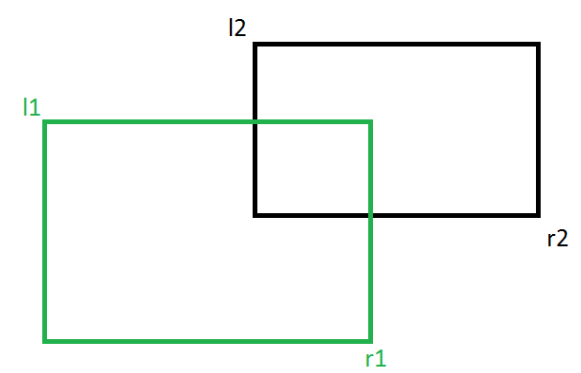



In [41]:
class Point:
    def __init__(self,x,y):
        self.x=x
        self.y=y
def doOverLap(l1,r1,l2,r2):
    if l1.x>r2.x or l2.x>r1.x:
        return True
    if l1.y>r2.y or l2.y>r1.y:
        return True
l1 = Point(0, 10)
r1 = Point(10, 0)
l2 = Point(5, 5)
r2 = Point(15, 0)    
if(doOverLap(l1,r1,l2,r2)):
    print("They Overlap")
else:
    print("They don't overlap")
    

They Overlap


#Factorial of a Number

Given the non-negative integers n , compute the factorial of a given number.
Note: Factorial of n is defined as n * (n -1) * (n - 2) * ... * 1, for n = 0, factorial is 1.

In [ ]:
def Factorial(n):
    result=1
    for i in range(2,n+1):
        result*=i
        i+=1
    return result
Factorial(3)
# [Approach - 1] - Iterative Solution O(n) Time and O(1) Space
# The idea is simple, we initialize result as 1. Then, run a loop from 1 to n and multiply every number with result.


6

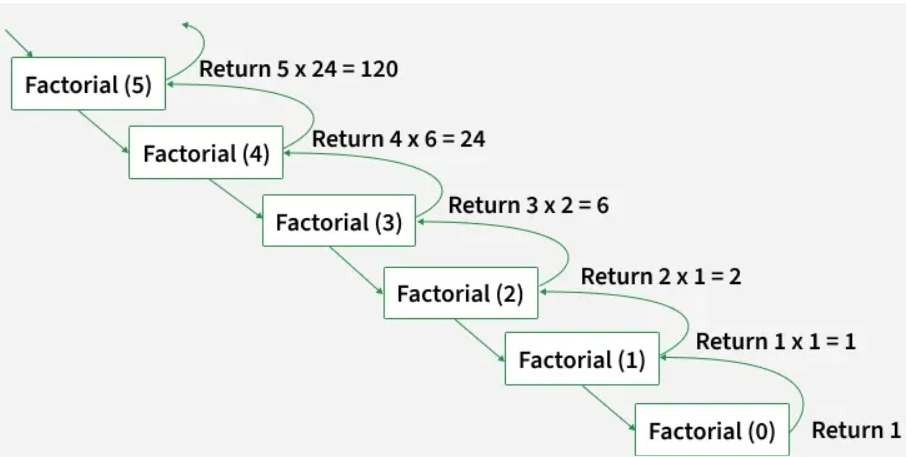

In [47]:
def Factorial(n):
    if n==0:
        return 1
    return n*Factorial(n-1)
Factorial(3)
#[Another Approach]- Recursive Solution O(n) Time and O(n) Space

6

#Pair Cube Count

Given n, count all 'a' and 'b' that satisfy the condition a^3 + b^3 = n. Where (a, b) and (b, a) are considered two different pairs

Examples: 

Input: n = 9
Output: 2
Explanation: 1^3 + 2^3 = 9 and 2^3 + 1^3 = 9

Input: n = 28
Output: 2
Explanation: 1^3 + 3^3 = 28 and 3^3 + 1^3 = 28

In [ ]:
def pairCubeCount(n):
    count=0
    for a in range(1,n+1):
        for b in range(n+1):
            if math.pow(a,3) + math.pow(b,3) == n:
                count+=1
                break
    return count
print(pairCubeCount(16))
# [Naive Approach] Using Nested Loops - O(n^2) time and O(1) space
# The approach uses a nested loop to check all pairs (a, b) where a3+b3=n. If the condition holds, the count is incremented.

1


In [ ]:
def pairCubeCount(n):
    count=0
    for i in range(1,int(math.pow(n,1/3))+1):
        cur_cube=i*i*i
        cur_cube_diff_n=n-cur_cube
        cur_cube_diff_n_root=round(math.pow(cur_cube_diff_n,1/3))
        if cur_cube_diff_n_root*cur_cube_diff_n_root*cur_cube_diff_n_root ==cur_cube_diff_n:
            count+=1
    return count
print(pairCubeCount(9))

# Expected Approach] Finding different pairs - O(n1/3) time and O(1) space
# While traversing numbers from 1 to the cube root of n, Subtract the cube
# of the current number from n and check if their difference is a perfect cube. 

2


Program to Find GCD or HCF of Two Numbers

Given two positive integers a and b, the task is to find the GCD of the two numbers.

Note: The GCD (Greatest Common Divisor) or HCF (Highest Common Factor) of two numbers is the largest number that divides both of them. 
Input: a = 20, b = 28
Output: 4
Explanation: The factors of 20 are 1, 2, 4, 5, 10 and 20. The factors of 28 are 1, 2, 4, 7, 14 and 28. Among these factors, 1, 2 and 4 are the common factors of both 20 and 28. The greatest among the common factors is 4.

Input: a = 60, b = 36
Output: 12
Explanation: GCD of  60 and 36 is 12.

In [ ]:
def gcd(a,b):
    result=min(a,b)
    while result>0:
        if a%result==0 and b%result==0:
            break
        result-=1
    return result
gcd(20,28)
# [Approach - 1] Using Loop - O(min(a, b)) Time and O(1) Space
# The idea is to find the minimum of the two numbers and find its highest factor which is also a factor of the other number. 


4

In [ ]:
def gcd(a,b):
    if a==0:
        return b
    if b==0:
        return a
    if a==b:
        return a
    if a>b:
        return gcd(a-b,b)
    return gcd(a,b-a)
print(gcd(20,28))

# [Approach - 2] Euclidean Algorithm using Subtraction - O(min(a,b)) Time and O(min(a,b)) Space
# The idea of this algorithm is, the GCD of two numbers doesn'tchange if the smaller number is subtracted 
# from the bigger number. This is the Euclidean algorithm by subtraction.
# It is a process of repeat subtraction, carrying the result forward each time until the result is equal to 
# any one number being subtracted.

4


In [64]:
# [Approach - 3 ] Modified Euclidean Algorithm using Subtraction by Checking Divisibility - O(min(a, b)) Time and O(min(a, b)) 
# Space

def gcd(a,b):
    if a==0:
        return b
    if b==0: 
        return a
    if a==b:
        return a
    if a>b:
        if a%b==0:
            return b
        return gcd(a-b,b)
    if(b%a==0):
        return a
    return gcd(a,b-a)
print(gcd(42,14))

14


In [ ]:
# [Approach - 4] Optimized Euclidean Algorithm by Checking Remainder
# Instead of the Euclidean algorithm by subtraction, a better approach can be used.
# We don't perform subtraction here. we continuously divide the bigger number by the smaller number. 
# More can be learned about this efficient solution by using the modulo operator in Euclidean algorithm.
def gcd(a,b):
    if (b==0): 
        return a 
    else: 
        return gcd(b,a%b)
print(gcd(20,28))
'''Time Complexity: O(log(min(a,b)))

Each recursive call reduces the size of the numbers significantly using the modulo operation (a % b),
which shrinks the input faster than subtraction.
The worst-case scenario for the number of steps occurs when the inputs are consecutive Fibonacci numbers, 
like (21, 13), which maximizes the number of recursive calls.
Since Fibonacci numbers grow exponentially, and the number of steps increases linearly with their position, 
the time complexity becomes logarithmic in terms of the smaller number — O(log(min(a, b))).
Auxiliary Space: O(log(min(a,b))

The maximum number of recursive calls is proportional to the number of steps taken to reduce the input to zero,
 which is O(log(min(a, b))) in the worst case.'''

4


In [68]:
# [Approach - 5] Using Built-in Function - O(log(min(a, b))) Time and O(1) Space
import math
def gcd(a,b):
    return math.gcd(a,b)
gcd(20,28)

4

Program to find LCM of two numbers
Last Updated : 26 Aug, 2025
Given two positive integers a and b. Find the Least Common Multiple (LCM) of a and b.
LCM of two numbers is the smallest number which can be divided by both numbers. 

Input :  a = 10, b = 5
Output :  10
Explanation : 10 is the smallest number divisible by both 10 and 5

Input :  a = 5, b = 11
Output :  55
Explanation : 55 is the smallest number divisible by both 5 and 11

In [ ]:
def gcd(a,b):
    if b==0:
        return a
    else:
        return gcd(b,a%b)
def lcm(a,b):
    return (a*b)//gcd(a,b)
print(lcm(10,5))

# Mathematicians have proven (Knuth, 1976 📚) that in the worst case,
# each step reduces the numbers about as fast as Fibonacci sequence decreases.

# That means the number of steps is proportional to:
     #   log(min(a,b))
# So, the algorithm finishes in logarithmic time relative to the smaller input.

# Time Complexity: O(log(min(a,b))
# Auxiliary Space: O(log(min(a,b))

10


Perfect Number
Last Updated : 23 Jul, 2025
A number is a perfect number if it is equal to the sum of its proper divisors, that is, the sum of its positive divisors excluding the number itself. Find whether a given positive integer n is perfect or not.
Examples: 

Input: n = 15
Output: false
Explanation: Divisors of 15 are 1, 3 and 5. Sum of divisors is 9 which is not equal to 15.

Input: n = 6
Output: true
Explanation: Divisors of 6 are 1, 2 and 3. Sum of divisors is 6.

In [ ]:
def PerfectNumber(n):
    sum=0
    for i in range(1,n):
        if n%i==0:
            sum+=i
    if sum==n:
        return True
    else:
        return False
print(PerfectNumber(6))
# [Naive Approach] Divisor Sum Method - O(n) Time and O(1) Space
# A simple Solution is to go through every number from 1 to n-1 and check if it is a divisor. 
# Maintain sum of all divisors. If sum becomes equal to n, then return true, else return false.

True


In [77]:
# [Expected Approach] Optimized Divisor Search Method - O(sqrt n) Time and O(1) Space
# An efficient Solution is to go through numbers till square root of n. 
# If a number 'i' divides n, then add both 'i' and 'n/i' .
def PerfectNumber(n):
    sum=1
    for i in range(2,int(math.sqrt(n))+1):
        if n%i==0:
            if i*i==n:
                sum+=i
            else:
                sum+=i+n//i
    if sum==n:
        return True
    return False
PerfectNumber(6)

True

Program to add two fractions
Last Updated : 21 Mar, 2025
Given two integer arrays a[] and b[] containing two integers each representing the numerator and denominator of a fraction respectively. The task is to find the sum of the two fractions and return the numerator and denominator of the result.

In [ ]:
def gcd(a,b):
    if b==0:
        return a
    return gcd(b,a%b)
def AddTwoFractions(a,b):
    gcdOfDen=gcd(a[1],b[1])
    commonDenFactor=(a[1]*b[1])//gcdOfDen
    numconversion=a[0]*(commonDenFactor//a[1]) + b[0]*(commonDenFactor//b[1])
    commonFactor=gcd(numconversion,commonDenFactor)
    num=numconversion//commonFactor
    den=commonDenFactor//commonFactor
    return[num,den]

a=[1,5]
b=[3,15]
print( AddTwoFractions(a,b))

# Time Complexity : O(log(min(a, b))
# Auxiliary Space : O(1)

[2, 5]


Find day of the week for a given date
Last Updated : 14 Feb, 2025
Given a date (day, month, year), the task is to determine the day of the week on which that date falls. The function should be able to compute the day for any date in the past or future. The function should return values from 0 to 6 where 0 means Sunday, 1 Monday and so on.

In [ ]:
def day_of_week(d, m, y):
    # Predefined month codes for each month
    month_code = [6, 2, 2, 5, 0, 3, 5, 1, 4, 6, 2, 4]
    if m<3:
        y=-1
    #Adjust the year
    last_2_digits_of_year=y%100
    year_code=last_2_digits_of_year+last_2_digits_of_year//4
    #Adjust the century
    century=y//100
    year_code_adjusted=(year_code+(century//4)+(century*5))%7
    return(d+month_code[m-1]+year_code_adjusted)%7
day = 15
month = 6
year = 1995
print(day_of_week(day, month, year))
# Time Complexity: O(1)
# Auxiliary Space: O(1)

4


Predefined Month Codes (t[]):
The array t[] stores month codes for each month. These values are predefined to account for the different lengths of each month.
For example: January = 6, February = 2 (or 1 for leap years), March = 2, etc.
Adjusting the Year for January and February (y -= m < 3):
The code adjusts the year if the month is January or February.
This is because in Zeller's Congruence, January and February are treated as the 13th and 14th months of the previous year.
If the month is January or February, it reduces the year by 1 (i.e., y -= 1).
Leap Year Adjustments (y / 4 - y / 100 + y / 400): The formula adjusts for leap years and century years:
y / 4: Adds an adjustment for the leap years.
y / 100: Subtracts the days for century years that are not leap years.
y / 400: Adds back the leap days for century years that are divisible by 400 (e.g., 1600, 2000).
Final Calculation:
The formula: (y + y/4 − y/100 + y/400 + t[m−1] + d) % 7 calculates the day of the week by summing the day (d), month code (t[m - 1]), and adjusted year values.
The result is then taken modulo 7, which gives a value between 0 and 6, corresponding to the days of the week: 0 = Sunday, 1 = Monday, ..., 6 = Saturday.Zeller's Congruence-Based Approach
This approach calculates the day of the week for a given date using a formula involving the year, month, and day. It is essentially a simplified version of Zeller's Congruence, with adjustments for century years and leap years.

In [ ]:
def dayofweek(d, m, y):
    t = [ 0, 3, 2, 5, 0, 3,
          5, 1, 4, 6, 2, 4 ]
    if m<3:
        y-=1
    leap_year_adjustment=int(y/4)
    not_leap_year_days=int(y/100)
    leap_year_days=int(y/400)
    return (y+leap_year_adjustment-not_leap_year_days+leap_year_days+t[m-1]+d)%7
print(dayofweek(30, 8, 2010))
# Time Complexity: O(1)
# Auxiliary Space: O(1)

1


Nth Fibonacci Number
Last Updated : 23 Jul, 2025
Given a positive integer n, the task is to find the nth Fibonacci number.

The Fibonacci sequence is a sequence where the next term is the sum of the previous two terms. The first two terms of the Fibonacci sequence are 0 followed by 1. The Fibonacci sequence: 0, 1, 1, 2, 3, 5, 8, 13, 21

In [ ]:
def fib(n):
    if n<=1:
        return n
    return fib(n-1)+fib(n-2)
print(fib(5))
'''[Naive Approach] Using Recursion
We can use recursion to solve this problem because any Fibonacci number n depends on previous two Fibonacci numbers. Therefore, this approach repeatedly breaks down the problem until it reaches the base cases.

Recurrence relation:

Base case: F(n) = n, when n = 0 or n = 1
Recursive case: F(n) = F(n-1) + F(n-2) for n>1'''
# Time Complexity: O(2n)
# Auxiliary Space: O(n), due to recursion stack

5


In [ ]:
'''[Expected Approach-1] Memoization Approach
In the previous approach there is a lot of redundant calculation that are calculating again and again, 
So we can store the results of previously computed Fibonacci numbers in a memo table to avoid redundant calculations. 
This will make sure that each Fibonacci number is only computed once, this will reduce the exponential time complexity of 
the naive approach O(2^n) into a more efficient O(n) time complexity'''
def fib(n):
    mem=[-1]*(n+1)
    return fibo_util(n,mem)
def fibo_util(n,mem):
    if n<=1:
        return n
    if mem[n]!=-1:
        return mem[n]
    mem[n] =fibo_util(n-1,mem)+fibo_util(n-2,mem)
    return mem[n]
print(fib(5))
# Time Complexity: O(n), each fibonacci number is calculated only one times from 1 to n;
# Auxiliary Space: O(n), due to memo table

5


In [ ]:
'''Expected Approach-2] Bottom-Up Approach
This approach uses dynamic programming to solve the Fibonacci problem by storing previously calculated Fibonacci numbers, 
avoiding the repeated calculations of the recursive approach. Instead of breaking down the problem recursively, 
it iteratively builds up the solution by calculating Fibonacci numbers from the bottom up.'''
def fibdp(n):
    dp=[0]*(n+1)
    dp[0]=0
    dp[1]=1
    for i in range(2,n+1):
        dp[i]=dp[i-1]+dp[i-2]
    return dp[n]
fibdp(5)
# Time Complexity: O(n), the loop runs from 2 to n, performing a constant amount of work per iteration.
# Auxiliary Space: O(n), due to the use of an extra array to store Fibonacci numbers up to n.

5

In [ ]:
'''[Expected Approach-3] Space Optimized Approach
This approach is just an optimization of the above iterative approach,
Instead of using the extra array for storing the Fibonacci numbers, we can store the values in the variables.
 We keep the previous two numbers only because that is all we need to get the next Fibonacci number in series.'''
def fibusingvar(n):
    if n<=1:
        return n
    prev2=0
    prev1=1
    cur=0
    for i in range(2,n+1):
        cur=prev1+prev2
        prev2=prev1
        prev1=cur
    return cur
print(fibusingvar(5))
# Time Complexity: O(n), The loop runs from 2 to n, performing constant time operations in each iteration.)
# Auxiliary Space: O(1), Only a constant amount of extra space is used to store the current and two previous Fibonacci numbers.

5


In [92]:
# Function to multiply two 2x2 matrices
def multiply(mat1, mat2):
  
    # Perform matrix multiplication
    x = mat1[0][0] * mat2[0][0] + mat1[0][1] * mat2[1][0]
    y = mat1[0][0] * mat2[0][1] + mat1[0][1] * mat2[1][1]
    z = mat1[1][0] * mat2[0][0] + mat1[1][1] * mat2[1][0]
    w = mat1[1][0] * mat2[0][1] + mat1[1][1] * mat2[1][1]

    # Update matrix mat1 with the result
    mat1[0][0], mat1[0][1] = x, y
    mat1[1][0], mat1[1][1] = z, w

# Function to perform matrix exponentiation
def matrix_power(mat1, n):
  
    # Base case for recursion
    if n == 0 or n == 1:
        return

    # Initialize a helper matrix
    mat2 = [[1, 1], [1, 0]]

    # Recursively calculate mat1^(n // 2)
    matrix_power(mat1, n // 2)

    # Square the matrix mat1
    multiply(mat1, mat1)

    # If n is odd, multiply by the helper matrix mat2
    if n % 2 != 0:
        multiply(mat1, mat2)

# Function to calculate the nth Fibonacci number
def nth_fibonacci(n):
    if n <= 1:
        return n

    # Initialize the transformation matrix
    mat1 = [[1, 1], [1, 0]]

    # Raise the matrix mat1 to the power of (n - 1)
    matrix_power(mat1, n - 1)

    # The result is in the top-left cell of the matrix
    return mat1[0][0]

if __name__ == "__main__":
    n = 5
    result = nth_fibonacci(n)
    print(result)

5


Decimal to Binary Conversion Program
Last Updated : 14 Jul, 2025
Given a non negative number n, the task is to convert the given number into an equivalent binary representation.

In [ ]:
def DecToBinary(n):
    binArr=[]
    while n>0:
        bit=n%2
        binArr.append(str(bit))
        n//=2
    binArr.reverse()
    return "".join(binArr)

print(DecToBinary(12))
# [Approach - 1] Division by 2 - O(log₂(n)) Time and O(log₂(n)) Space
# To convert a decimal number to binary, repeatedly divide it by 2 and record the remainders. 
# Reading these remainders in reverse gives the binary representation.

1100


In [ ]:

def DecToBinaryRec(n,binArr):
    if n==0:
        return 
    DecToBinaryRec(n//2,binArr)
    binArr.append(str(n%2))

def DecToBinary(n):
    if n==0:
        return '0'
    binArr=[]
    DecToBinaryRec(n,binArr)
    return "".join(binArr)

print(DecToBinary(12))

'''Step 1: Call stack expansion (divide by 2 each time)

n = 12: recurse with 12 // 2 = 6

n = 6: recurse with 6 // 2 = 3

n = 3: recurse with 3 // 2 = 1

n = 1: recurse with 1 // 2 = 0
→ base case, return.

Step 2: Unwinding recursion (append remainders)

Now we append n % 2 as we return from each call:

Returning from n=1: append 1 % 2 = 1 → binArr = ["1"]

Returning from n=3: append 3 % 2 = 1 → binArr = ["1","1"]

Returning from n=6: append 6 % 2 = 0 → binArr = ["1","1","0"]

Returning from n=12: append 12 % 2 = 0 → binArr = ["1","1","0","0"]

Step 3: Join results

"".join(binArr) → "1100"'''
# [Approach - 2] Using Head Recursion - O(log₂(n)) Time and O(log₂(n)) Space
# The idea is same as the previous approach, but we will use recursion to generate the binary equivalent number.

1100


In [99]:
'''[Approach - 3] Using Bitwise Operators - O(log₂(n)) Time and O(log₂(n)) Space
Using bitwise operators, we can extract binary digits by checking the least significant bit (n & 1) and then right-shifting the number 
(n >> 1) to process the next bit.
This method is faster than arithmetic division and modulo, as bitwise operations are more efficient at the hardware level.'''
def DecToBinary(n):
    binArr=""
    while n>0:
      bit=n&1
      binArr+=str(bit)
      n=n>>1
    return binArr[::-1]
print(DecToBinary(12))


1100


In [ ]:
def DecToBinary(n):
    return bin(n)[2::]
print(DecToBinary(12))


1100


Find n-th term of series 1, 3, 6, 10, 15, 21...
Last Updated : 21 Mar, 2025
Given a number n, find the n-th term in the series 1, 3, 6, 10, 15, 21...

In [2]:
'''[Naive approach] Using Loop - O(n) time and O(1) space
The series sums the first n natural numbers, with each term adding one more number. The nth term is the sum of the first n natural numbers.'''
def nthTerm(n):
    sum=0
    for i in range(1,n+1):
        sum+=i
    return sum
print(nthTerm(4))


10


In [ ]:
def nthTerm(n):
    sum=0
    for i in range(1,n+1):
        return n*(n+1)//2
print(nthTerm(4))
'''[Expected Approach] Using Formula - O(1) time and O(1) space
The pattern in this series is nth term is equal to sum of (n-1)th term and n.'''

10


Check if a number is Palindrome
Given an integer n, determine whether it is a palindrome number or not. A number is called a palindrome if it reads the same from forward and backward.

In [ ]:
def isPalindrome(n):
    rev=0
    temp=abs(n)
    while n>0:
        rev=rev*10+n%10
        n=n//10
    if rev==temp:
        return True
    return False
print(isPalindrome(121))
'''[Expected Approach] - By Reversing The Number
The idea is to find the reverse of the original number and then compare the reversed number with the original number. 
If the reversed number is same as the original number, the number is palindrome. Otherwise, the number is not a palindrome.  '''
# Time Complexity : O(d) , where d = log₁₀(n)
# Auxiliary space: O(1)

True


In [ ]:
def isPalindrome(n):
    sn=str(n)
    lensn=len(sn)
    for i in range(lensn//2):
        if sn[i]==sn[lensn-i-1]:
            return True
        return False
print(isPalindrome(121))
# Time Complexity : O(d) , where d = log₁₀(n)
# Auxiliary space: O(d) , where d = log₁₀(n)


True


Program for Armstrong Numbers

Given a number x, determine whether the given number is Armstrong's number or not. A positive integer of n digits is called an Armstrong number of order n (order is the number of digits) if

abcd... = pow(a,n) + pow(b,n) + pow(c,n) + pow(d,n) + ....

In [ ]:
import math
def Armstrong(n):
    sn=str(n)
    sum=0
    length=len(sn)
    for i in sn:
        sum=sum+math.pow(int(i),length)
    if sum==n:
        return True
    return False
print(Armstrong(153))
'''[Approach 2] Using Numeric Strings
The idea is to determine if a number is an Armstrong number by first converting it to a string to easily access its digits 
and count them. Each digit is then raised to the power of the total number of digits, and the results are summed. If this 
sum is equal to the original number, it is classified as an Armstrong number. This approach leverages simple string manipulation and 
power calculation to perform the check efficiently.
Time Complexity: O(d*log(d)), where d is the number of digits in n, since we compute the power for each digit.
Space Complexity: O(1)'''

True


Digital Root (repeated digital sum) of the given large integer

The digital root of a positive integer is found by summing the digits of the integer. If the resulting value is a single digit then that digit is the digital root. If the resulting value contains two or more digits, those digits are summed and the process is repeated. This is continued as long as necessary to obtain a single digit.
Given a number, the task is to find its digital root. The input number may be large and it may not be possible to store even if we use long long int.

Examples :
Input : num = "1234"
Output : 1
Explanation : The sum of 1+2+3+4 = 10, digSum(x) == 10,Hence ans will be 1+0 = 1

Input : num = "5674"
Output : 4 

In [ ]:
'''Expected Approach] Using Mathematical Formula
We know that every number in the decimal system can be expressed as a sum of its digits multiplied by powers of 10. For example, a number represented as abcd can be written as follows:

abcd = a*10^3 + b*10^2 + c*10^1 + d*10^0   

We can separate the digits and rewrite this as:
abcd = a + b + c + d + (a*999 + b*99 + c*9)
abcd = a + b + c + d + 9*(a*111 + b*11 + c)

This implies that any number can be expressed as the sum of its digits plus a multiple of 9.
So, if we take modulo with 9 on each side, 
abcd % 9 = (a + b + c + d) % 9 + 0

This means that the remainder when abcd is divided by 9 is equal to the remainder where the sum of its digits (a + b + c + d) is divided by 9.'''
def printDigitalSum(n):
    if n==0:
        return 0
    if n%9==0:
        return 9
    return n%9
print(printDigitalSum(1234))
# Time Complexity: O(1)
# Auxiliary Space: O(1)

1
